In [2]:
import os
import pandas as pd
import librosa
from tqdm import tqdm

METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/filtered_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 22050 * 30  # Minimum required samples, e.g., 30 seconds at 22050 Hz

def downsample_tracks(metadata_path, downsample_ratios):
    """
    Downsamples tracks for each genre according to specified ratios in metadata only.

    Parameters:
        metadata_path (str): Path to the custom metadata CSV file.
        downsample_ratios (dict): Dictionary with genres as keys and downsampling factors (0-1) as values.

    Returns:
        DataFrame: Downsampled DataFrame of tracks.
    """
    # Load the metadata file
    tracks = pd.read_csv(metadata_path, index_col=0)

    # Initialize an empty list to store downsampled DataFrames
    downsampled_dfs = []

    # Loop through each genre and apply downsampling
    for genre, ratio in downsample_ratios.items():
        genre_tracks = tracks[tracks['primary_genre'] == genre]

        # Downsample if ratio < 1, otherwise keep all tracks
        if ratio < 1:
            num_samples = int(len(genre_tracks) * ratio)
            genre_tracks_downsampled = genre_tracks.sample(num_samples, random_state=42)
            print(f"Downsampled {genre} from {len(genre_tracks)} to {len(genre_tracks_downsampled)} tracks")
        else:
            genre_tracks_downsampled = genre_tracks
            print(f"Kept all tracks for {genre} (total: {len(genre_tracks)})")

        downsampled_dfs.append(genre_tracks_downsampled)

    # Combine all downsampled DataFrames
    downsampled_tracks = pd.concat(downsampled_dfs)

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after downsampling:")
    print(downsampled_tracks['primary_genre'].value_counts())

    return downsampled_tracks

# Define downsampling ratios for each genre
# downsample_ratios = {
#     'Electronic': 0.078,
#     'Avant-Garde': 0.175,
#     'Experimental': 0.2,
#     'Rock': 0.225,
#     'Pop': 0.26,
#     'Folk': 0.35,
#     'Hip-Hop': 0.37,
#     'Punk': 0.42,
#     'Noise': 0.44,
#     'Lo-Fi': 0.55,
#     'Experimental Pop': 0.55,
#     'Ambient Electronic': 0.74,
#     'Jazz': 0.86,
#     'Classical': 0.90,
#     'International': 0.95,
#     'Blues': 1.0,  # Keep all for Blues
# }
downsample_ratios = {'Classical': 0.155763,
'Blues' :0.151057,
'Hip-Hop' :0.048900,
'Ambient' :0.033501,
'Noise' :0.034843,
'Field Recordings' :0.085985,
'Old-Time / Historic' :0.534759,
'Techno' :0.158730,
'Jazz' :0.160000,
'Country' :0.341297,
'Drone' :0.134409,
'Chiptune' :0.352113,
'Garage' :0.129366,
'Soul-RnB' :0.591716,
'Reggae - Dub' :0.347222,
'Punk' :0.059137,
}




# Perform downsampling
downsampled_tracks = downsample_tracks(METADATA_PATH, downsample_ratios)

# Optional: Save the downsampled data to a new CSV
downsampled_tracks.to_csv('downsampled_tracks_metadata.csv')





Downsampled Classical from 637 to 99 tracks
Downsampled Blues from 662 to 99 tracks
Downsampled Hip-Hop from 2036 to 99 tracks
Downsampled Ambient from 2985 to 100 tracks
Downsampled Noise from 2857 to 99 tracks
Downsampled Field Recordings from 1169 to 100 tracks
Downsampled Old-Time / Historic from 184 to 98 tracks
Downsampled Techno from 630 to 99 tracks
Downsampled Jazz from 618 to 98 tracks
Downsampled Country from 293 to 100 tracks
Downsampled Drone from 744 to 100 tracks
Downsampled Chiptune from 283 to 99 tracks
Downsampled Garage from 772 to 99 tracks
Downsampled Soul-RnB from 163 to 96 tracks
Downsampled Reggae - Dub from 288 to 99 tracks
Downsampled Punk from 1679 to 99 tracks

Number of tracks per genre after downsampling:
primary_genre
Ambient                100
Field Recordings       100
Country                100
Drone                  100
Classical               99
Blues                   99
Hip-Hop                 99
Noise                   99
Techno                  9

In [5]:
import pandas as pd
import os
import librosa
from tqdm import tqdm

# Paths and settings
METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata/custom_tracks_metadata.csv'
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
MIN_SAMPLES = 12000 * 30  # Set the minimum sample threshold (e.g., 30 seconds at 22050 Hz)

def filter_short_tracks(metadata_path, dataset_path, min_samples):
    """
    Filters out tracks with a sample count less than the specified threshold.

    Parameters:
        metadata_path (str): Path to the metadata CSV file.
        dataset_path (str): Path to the directory with audio files.
        min_samples (int): Minimum number of samples required for a track to be included.

    Returns:
        DataFrame: Filtered DataFrame of tracks.
    """
    # Load metadata
    tracks = pd.read_csv(metadata_path, index_col=0)

    # List to store valid track IDs
    valid_tracks = []

    # Progress bar for filtering
    print("Filtering tracks by minimum sample requirement...")
    for track_id in tqdm(tracks.index, desc="Checking track length"):
        folder = f"{int(track_id):03d}"[:3]  # Folder based on track_id
        file_path = os.path.join(dataset_path, folder, f"{track_id}.mp3")

        if os.path.isfile(file_path):
            try:
                # Load audio file and check length
                signal, _ = librosa.load(file_path, sr=None)
                if len(signal) >= min_samples:
                    valid_tracks.append(track_id)  # Track meets minimum sample requirement
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Filter metadata to include only valid tracks
    filtered_tracks = tracks.loc[valid_tracks]

    # Display the final count of tracks per genre
    print("\nNumber of tracks per genre after filtering:")
    print(filtered_tracks['primary_genre'].value_counts())

    return filtered_tracks

# Apply filtering
filtered_tracks = filter_short_tracks(METADATA_PATH, DATASET_PATH, MIN_SAMPLES)

# Optional: Save the filtered data to a new CSV
filtered_tracks.to_csv('filtered_tracks_metadata.csv')
print("Filtered metadata saved to 'filtered_tracks_metadata.csv'.")


Filtering tracks by minimum sample requirement...


Checking track length:  58%|█████████████████████████████▏                    | 21068/36133 [00:00<00:00, 34918.15it/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_5432\3680279564.py:38: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, _ = librosa.load(file_path, sr=None)
C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101265.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101272.mp3: 
Error loading C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large\101\101275.mp3: 


Checking track length:  67%|█████████████████████████████████▉                 | 24031/36133 [00:08<00:04, 2920.25it/s]


KeyboardInterrupt: 

In [3]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Paths (same as your original)
DATASET_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_large/fma_large'
METADATA_PATH = 'C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/downsampled_tracks_metadata.csv' 
JSON_PATH = "data_fma.json"
SAMPLE_RATE = 12000
TRACK_DURATION = 30  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

def print_genre_counts(metadata_path, target_genres=None):
    """Same as your original function"""
    tracks = pd.read_csv(metadata_path, index_col=0)
    if target_genres:
        tracks = tracks[tracks['primary_genre'].isin(target_genres)]
        print(f"Filtered tracks by target genres: {len(tracks)}")
    genre_counts = tracks['primary_genre'].value_counts()
    print("\nNumber of tracks per genre:")
    print(genre_counts)

def load_metadata(metadata_path, dataset_path, target_genres=None):
    """Same as your original function"""
    tracks = pd.read_csv(metadata_path, index_col=0)
    if target_genres:
        tracks = tracks[tracks['primary_genre'].isin(target_genres)]
        print(f"Filtered tracks by target genres: {len(tracks)}")

    available_tracks = set()
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.mp3'):
                track_id = int(os.path.splitext(file)[0])
                available_tracks.add(track_id)

    tracks = tracks[tracks.index.isin(available_tracks)]
    print(f"Tracks after file check: {len(tracks)}")
    return tracks['primary_genre'].dropna()

def save_features(dataset_path, json_path, metadata_path, target_genres, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """
    Modified version of your save_mfcc() that includes all features while maintaining the same structure
    """
    data = {
        "mapping": target_genres,
        "labels": [],
        "mfcc": [],          # Keeps same structure as original
        "other_features": [] # New: Stores all other features
    }

    genre_data = load_metadata(metadata_path, dataset_path, target_genres)
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    with tqdm(total=len(genre_data), desc="Processing files", unit="file") as pbar:
        for track_id, genre in genre_data.items():
            folder = f"{int(track_id):03d}"[:3]
            file_path = os.path.join(dataset_path, folder, f"{track_id}.mp3")
            
            if os.path.isfile(file_path):
                try:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                    
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment
                        segment = signal[start:finish]
                        
                        if len(segment) < samples_per_segment:
                            segment = np.pad(segment, (0, samples_per_segment - len(segment)), mode='constant')

                        # Extract MFCCs (same as original)
                        mfcc = librosa.feature.mfcc(y=segment, sr=sample_rate,
                                                  n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T
                        
                        # Extract other features (new)
                        other_features = extract_other_features(segment, sample_rate)
                        
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["other_features"].append(other_features)
                            data["labels"].append(target_genres.index(genre))
                        else:
                            print(f"Skipping segment {d} in {file_path} due to unexpected MFCC shape.")

                    pbar.update(1)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
    print(f"\nFeatures saved to {json_path}")

def extract_other_features(segment, sample_rate):
    """Helper function to extract all non-MFCC features"""
    features = []
    
    # Pitch (Yin algorithm)
    try:
        f0 = librosa.yin(segment, fmin=20, fmax=sample_rate//2)
        f0 = f0[f0 > 0]  # Remove zeros
        features.append(float(np.mean(f0)) if len(f0) > 0 else 0.0)
    except:
        features.append(0.0)
    
    # Tempo
    onset_env = librosa.onset.onset_strength(y=segment, sr=sample_rate)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    features.append(float(tempo))
    
    # Beats (mean interval)
    _, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sample_rate)
    beats = librosa.frames_to_time(beats, sr=sample_rate)
    if len(beats) > 1:
        features.append(float(np.mean(np.diff(beats))))
    else:
        features.append(0.0)
    
    # Rhythm patterns
    stft = librosa.stft(segment, n_fft=2048, hop_length=512)
    magnitude = np.abs(stft)
    NUM_RHYTHM_BANDS = 6
    band_indices = np.linspace(0, magnitude.shape[0], NUM_RHYTHM_BANDS + 1, dtype=int)
    energy_bands = np.zeros((NUM_RHYTHM_BANDS, magnitude.shape[1]))
    for b in range(NUM_RHYTHM_BANDS):
        energy_bands[b] = np.sum(magnitude[band_indices[b]:band_indices[b+1]], axis=0)
    rhythm_features = []
    for b in range(NUM_RHYTHM_BANDS):
        autocorr = np.correlate(energy_bands[b], energy_bands[b], mode='full')
        rhythm_features.extend(autocorr[len(autocorr)//2:])  # Keep non-negative lags
    features.extend(rhythm_features)
    
    # Chroma features (mean)
    chroma = librosa.feature.chroma_stft(y=segment, sr=sample_rate, n_fft=2048, hop_length=512)
    features.extend(np.mean(chroma, axis=1).tolist())
    
    # RMS dynamics
    rms = librosa.feature.rms(y=segment, frame_length=2048, hop_length=512)[0]
    features.append(float(np.mean(rms)))
    features.append(float(np.std(rms)))
    features.append(float((np.max(rms) - np.min(rms)) / (np.max(rms) + 1e-10)))
    
    return features

def load_data(data_path):
    """Modified to load both MFCCs and other features"""
    with open(data_path, "r") as fp:
        data = json.load(fp)
    
    # MFCCs (same as original)
    X_mfcc = np.array(data["mfcc"])
    
    # Other features (new)
    X_other = np.array(data["other_features"])
    
    y = np.array(data["labels"])
    return X_mfcc, X_other, y

def prepare_datasets(test_size, validation_size):
    """Modified version that maintains your augmentation approach"""
    # Load data
    X_mfcc, X_other, y = load_data(JSON_PATH)
    
    # Split data
    (X_mfcc_train, X_mfcc_test, 
     X_other_train, X_other_test, 
     y_train, y_test) = train_test_split(X_mfcc, X_other, y, test_size=test_size)
    
    (X_mfcc_train, X_mfcc_val, 
     X_other_train, X_other_val, 
     y_train, y_val) = train_test_split(X_mfcc_train, X_other_train, y_train, 
                                      test_size=validation_size)

    # === Data Augmentation (same as your original) ===
    # Reverse MFCCs
    X_mfcc_train_reversed = np.flip(X_mfcc_train, axis=1)
    y_train_reversed = y_train.copy()
    
    # Time shifting
    max_shift = int(0.1 * X_mfcc_train.shape[1])
    X_mfcc_train_shifted = []
    X_other_train_shifted = []
    y_train_shifted = []
    
    for i in range(X_mfcc_train.shape[0]):
        shift = np.random.randint(1, max_shift)
        shifted_mfcc = np.roll(X_mfcc_train[i], shift, axis=1)
        X_mfcc_train_shifted.append(shifted_mfcc)
        X_other_train_shifted.append(X_other_train[i])  # Other features don't get shifted
        y_train_shifted.append(y_train[i])
    
    X_mfcc_train_shifted = np.array(X_mfcc_train_shifted)
    X_other_train_shifted = np.array(X_other_train_shifted)
    y_train_shifted = np.array(y_train_shifted)
    
    # Combine original and augmented data
    X_mfcc_train_augmented = np.concatenate(
        (X_mfcc_train, X_mfcc_train_reversed, X_mfcc_train_shifted), axis=0)
    X_other_train_augmented = np.concatenate(
        (X_other_train, X_other_train, X_other_train_shifted), axis=0)
    y_train_augmented = np.concatenate(
        (y_train, y_train_reversed, y_train_shifted), axis=0)
    
    # Shuffle
    indices = np.arange(X_mfcc_train_augmented.shape[0])
    np.random.shuffle(indices)
    X_mfcc_train_augmented = X_mfcc_train_augmented[indices]
    X_other_train_augmented = X_other_train_augmented[indices]
    y_train_augmented = y_train_augmented[indices]
    
    # Normalize other features
    scaler = StandardScaler()
    X_other_train_augmented = scaler.fit_transform(X_other_train_augmented)
    X_other_val = scaler.transform(X_other_val)
    X_other_test = scaler.transform(X_other_test)
    
    # Add channel dimension to MFCCs
    X_mfcc_train_augmented = X_mfcc_train_augmented[..., np.newaxis]
    X_mfcc_val = X_mfcc_val[..., np.newaxis]
    X_mfcc_test = X_mfcc_test[..., np.newaxis]
    
    return (X_mfcc_train_augmented, X_other_train_augmented), \
           (X_mfcc_val, X_other_val), \
           (X_mfcc_test, X_other_test), \
           y_train_augmented, y_val, y_test

# The rest of your functions (plot_history, predict) remain unchanged

if __name__ == "__main__":
    target_genres = ['Classical',
'Blues',
'Hip-Hop',
'Ambient',
'Noise',
'Field Recordings',
'Old-Time / Historic',
'Techno',
'Jazz',
'Country',
'Drone',
'Chiptune',
'Garage',
'Soul-RnB',
'Reggae - Dub',
'Punk']
    
    # Save features (replaces save_mfcc)
    save_features(DATASET_PATH, JSON_PATH, METADATA_PATH, target_genres=target_genres, num_segments=10)
    
    # Prepare datasets
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

Filtered tracks by target genres: 1583
Tracks after file check: 1583


Processing files:   0%|                                                                     | 0/1583 [00:00<?, ?file/s]C:\Users\HASSAN\AppData\Local\Temp\ipykernel_5432\2944423485.py:119: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))
Processing files:   2%|█▎                                                          | 33/1583 [00:17<12:00,  2.15file/s]C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Processing files: 100%|██████████████████████████████████████████████████████████| 1583/1583 [12:51<00:00,  2.05file/s]



Features saved to data_fma.json


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 71, 13, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 71, 13, 1)         │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 71, 13, 64)        │             640 │ reshape_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 444)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 36, 7, 64)         │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 64)                │          28,480 │ other_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_6         │ (None, 36, 7, 64)         │             256 │ max_pooling2d_3[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_9         │ (None, 64)                │             256 │ dense_5[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 36, 7, 64)         │               0 │ batch_normalization_6[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 64)                │               0 │ batch_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 36, 7, 128)        │          73,856 │ dropout_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_10 (Dropout)          │ (None, 64)                │               0 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 18, 4, 128)        │               0 │ conv2d_4[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 128)               │           8,320 │ dropout_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_7         │ (None, 18, 4, 128)        │             512 │ max_pooling2d_4[0][0]      │
│ (BatchNormalization)          │                           │               

 Total params: 822,992 (3.14 MB)

 Trainable params: 821,712 (3.13 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.1253 - loss: 3.1245 - val_accuracy: 0.2496 - val_loss: 2.3101
Epoch 2/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.2127 - loss: 2.4407 - val_accuracy: 0.2541 - val_loss: 2.2329
Epoch 3/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.2470 - loss: 2.2743 - val_accuracy: 0.2841 - val_loss: 2.1265
Epoch 4/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.2800 - loss: 2.1886 - val_accuracy: 0.3235 - val_loss: 2.0734
Epoch 5/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.3087 - loss: 2.1046 - val_accuracy: 0.3796 - val_loss: 1.8994
Epoch 6/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.3292 - loss: 2.0418 - val_accuracy: 0.3653 - val_loss: 1.9321
Epoch 7/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.3494 - loss: 1.9707 - val_accuracy: 0.3890 - val_loss: 1.8149
Epoch 8/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.3630 - los

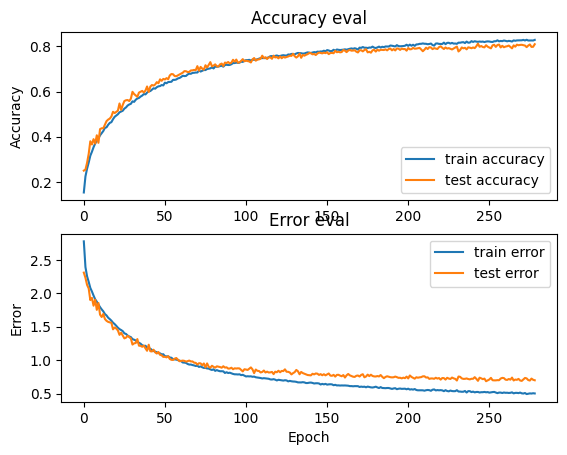

75/75 - 1s - 8ms/step - accuracy: 0.8155 - loss: 0.5926

Test Accuracy: 0.8155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Target: 3, Predicted label: [3]


In [7]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras


def build_hybrid_model(mfcc_shape, other_features_shape, num_classes=16):
    """Hybrid model with original CNN structure for MFCCs and Dense network for other features"""
    # --- CNN Branch (MFCCs) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # Original CNN architecture
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Flatten()(x)
    
    # --- Dense Branch (Other Features) ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    # Layer 1
    y = Dense(64)(other_input)
    y = BatchNormalization()(y)  # BN before activation
    y = Activation('relu')(y)
    y = Dropout(0.2)(y)
    
    # Layer 2 
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.3)(y)
    
    # Layer 3
    y = Dense(128)(y)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Dropout(0.4)(y)
    
    # --- Combine Branches ---
    combined = Concatenate()([x, y])
    
    # Final classification layers
    z = Dense(256, activation='relu')(combined)
    z = Dropout(0.5)(z)
    output = Dense(num_classes, activation='softmax')(z)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = ['Classical',
'Blues',
'Hip-Hop',
'Ambient',
'Noise',
'Field Recordings',
'Old-Time / Historic',
'Techno',
'Jazz',
'Country',
'Drone',
'Chiptune',
'Garage',
'Soul-RnB',
'Reggae - Dub',
'Punk']

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

True Genre: Ambient
Predicted Genre: Ambient
Confidence: 66.80%
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


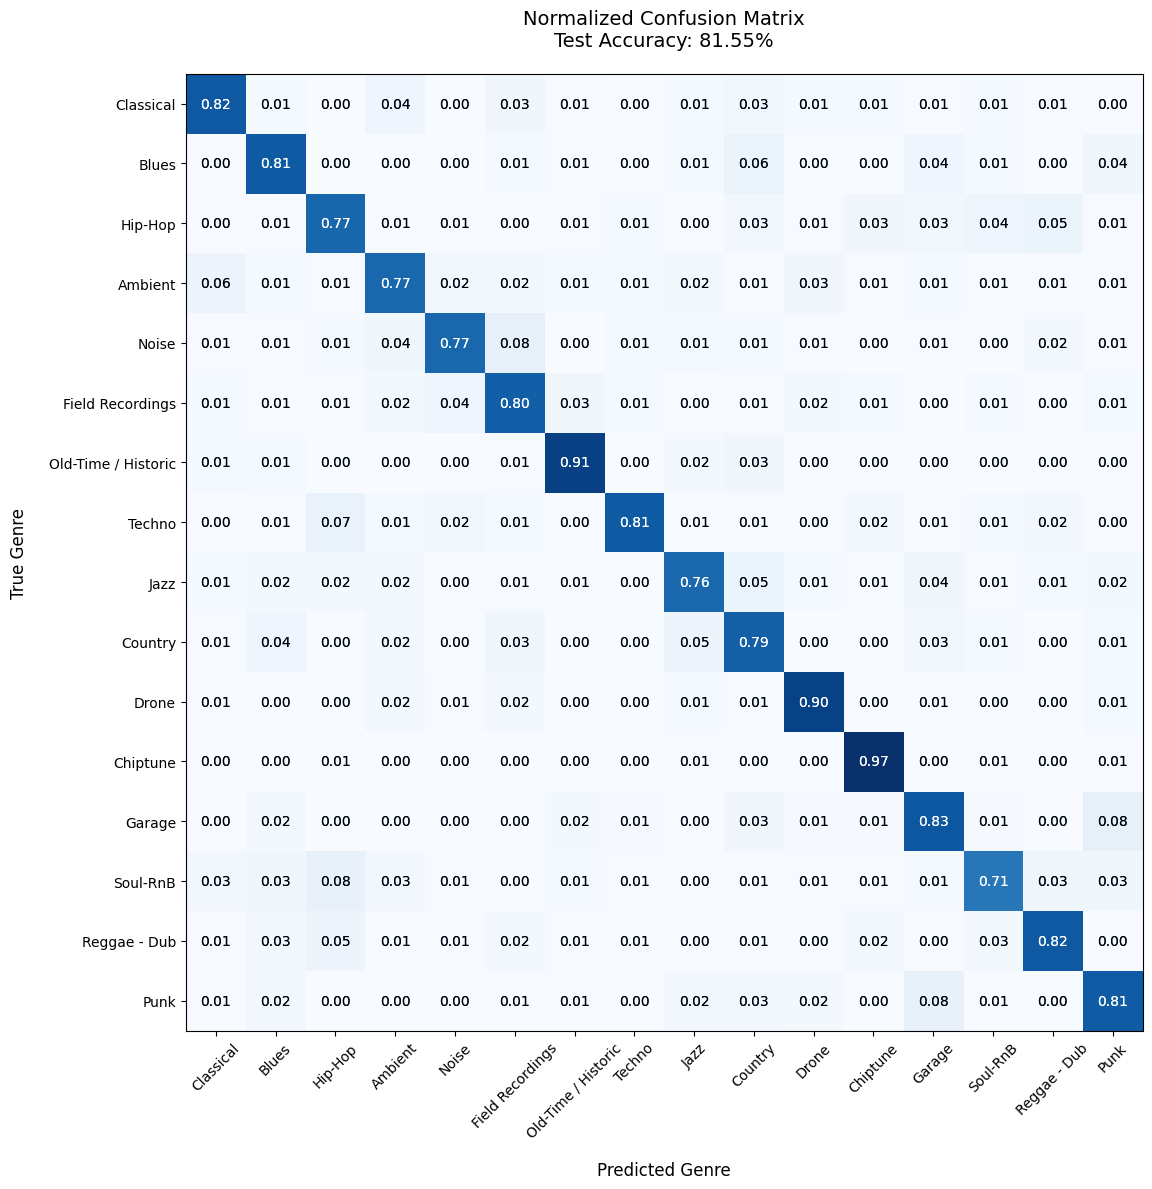


Classification Report:
                     precision    recall  f1-score   support

          Classical      0.841     0.819     0.830       155
              Blues      0.767     0.812     0.789       138
            Hip-Hop      0.766     0.771     0.768       157
            Ambient      0.801     0.767     0.784       163
              Noise      0.855     0.768     0.809       138
   Field Recordings      0.760     0.796     0.777       147
Old-Time / Historic      0.889     0.913     0.901       149
             Techno      0.924     0.811     0.864       164
               Jazz      0.799     0.759     0.778       141
            Country      0.719     0.793     0.754       145
              Drone      0.874     0.904     0.889       146
           Chiptune      0.886     0.974     0.928       152
             Garage      0.724     0.827     0.772       127
           Soul-RnB      0.798     0.705     0.749       146
       Reggae - Dub      0.841     0.819     0.830       149

In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# ================================================
# Single Sample Prediction
# ================================================
sample_idx = 100
X_mfcc_to_predict = X_mfcc_test[sample_idx]
X_other_to_predict = X_other_test[sample_idx]
y_to_predict = y_test[sample_idx]

# Predict and show results
predicted = model.predict([X_mfcc_to_predict[np.newaxis, ...], 
                         X_other_to_predict[np.newaxis, ...]])
print(f"\nTrue Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(predicted)]}")
print(f"Confidence: {np.max(predicted) * 100:.2f}%")

# ================================================
# Full Test Set Evaluation
# ================================================
# Generate predictions
y_pred = model.predict([X_mfcc_test, X_other_test])
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute normalized confusion matrix (row-wise)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create plot
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_norm,
    display_labels=[genre_labels[i] for i in range(len(genre_labels))]
)
disp.plot(
    cmap='Blues',
    ax=plt.gca(),
    xticks_rotation=45,
    values_format='.2f',  # Show 2 decimal places
    colorbar=False
)

# Add custom annotations
for i in range(len(genre_labels)):
    for j in range(len(genre_labels)):
        value = conf_matrix_norm[i, j]
        plt.text(j, i, f"{value:.2f}",
                ha="center", va="center",
                color="white" if value > 0.5 else "black",
                fontsize=10)

# Formatting
plt.title(f"Normalized Confusion Matrix\nTest Accuracy: {accuracy_score(y_test, y_pred_labels):.2%}", 
          pad=20, fontsize=14)
plt.xlabel("Predicted Genre", fontsize=12, labelpad=15)
plt.ylabel("True Genre", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# Print detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, 
                           target_names=genre_labels, digits=3))

# Show class distribution
print("\nClass Distribution in Test Set:")
for i, genre in enumerate(genre_labels):
    count = sum(y_test == i)
    if count > 0:
        acc = accuracy_score(y_test[y_test == i], y_pred_labels[y_test == i])
        print(f"{genre:<20}: {acc:.2%} ({count} samples)")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 71, 13, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_2 (Reshape)           │ (None, 71, 13, 1)         │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 71, 13, 64)        │             640 │ reshape_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_6               │ (None, 36, 7, 64)         │               0 │ conv2d_6[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_12        │ (None, 36, 7, 64)         │             256 │ max_pooling2d_6[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_14 (Dropout)          │ (None, 36, 7, 64)         │               0 │ batch_normalization_12[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 36, 7, 128)        │          73,856 │ dropout_14[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_7               │ (None, 18, 4, 128)        │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_13        │ (None, 18, 4, 128)        │             512 │ max_pooling2d_7[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_15 (Dropout)          │ (None, 18, 4, 128)        │               0 │ batch_normalization_13[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 18, 4, 128)        │          65,664 │ dropout_15[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_input (InputLayer)      │ (None, 444)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 9, 2, 128)         │               0 │ conv2d_8[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_3 (Reshape)           │ (None, 71, 13)            │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 128)               │          56,96

 Total params: 1,002,256 (3.82 MB)

 Trainable params: 1,000,848 (3.82 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 68s 56ms/step - accuracy: 0.1361 - loss: 3.0554 - val_accuracy: 0.2437 - val_loss: 2.2742
Epoch 2/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 52s 49ms/step - accuracy: 0.2288 - loss: 2.3676 - val_accuracy: 0.2703 - val_loss: 2.1972
Epoch 3/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.2784 - loss: 2.2060 - val_accuracy: 0.3008 - val_loss: 2.0703
Epoch 4/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - accuracy: 0.3104 - loss: 2.1227 - val_accuracy: 0.3353 - val_loss: 1.9697
Epoch 5/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.3365 - loss: 2.0322 - val_accuracy: 0.3816 - val_loss: 1.8838
Epoch 6/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 52s 49ms/step - accuracy: 0.3570 - loss: 1.9713 - val_accuracy: 0.3658 - val_loss: 1.8810
Epoch 7/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.3740 - loss: 1.9097 - val_accuracy: 0.3816 - val_loss: 1.8683
Epoch 8/300
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.3875 - los

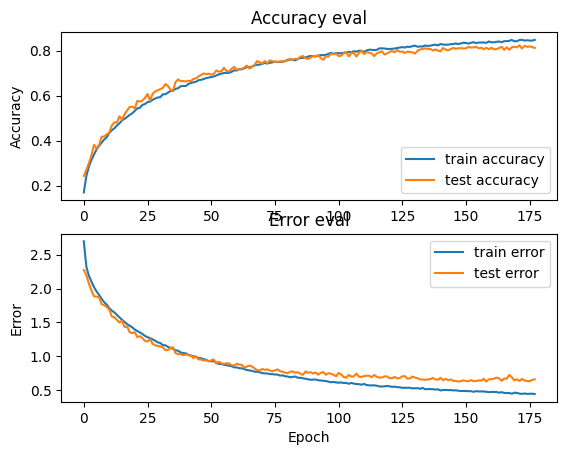

75/75 - 1s - 17ms/step - accuracy: 0.8372 - loss: 0.5839

Test Accuracy: 0.8372
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Target: 0, Predicted label: [0]


In [11]:
import json
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, BatchNormalization, 
                                    Dropout, Dense, Flatten, Concatenate, Reshape,
                                    Bidirectional, GRU, Activation)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

def build_hybrid_parallel_model(mfcc_shape, other_features_shape, num_classes=16):
    """Hybrid model with CNN+BGRU for MFCCs and Dense network for other features"""
    
    # --- MFCC Input Branch (CNN + BGRU) ---
    mfcc_input = Input(shape=mfcc_shape, name='mfcc_input')
    
    # Reshape MFCCs to (time_steps, 13, 1) for Conv2D
    x = Reshape((mfcc_shape[0], mfcc_shape[1], 1))(mfcc_input)
    
    # --- CNN Branch ---
    cnn_branch = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.2)(cnn_branch)
    
    cnn_branch = Conv2D(128, (3, 3), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)
    
    cnn_branch = Conv2D(128, (2, 2), activation='relu', padding='same')(cnn_branch)
    cnn_branch = MaxPooling2D((2, 2), strides=(2, 2), padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.4)(cnn_branch)
    
    cnn_branch = Flatten()(cnn_branch)
    
    # --- BGRU Branch ---
    time_steps = mfcc_shape[0]
    features = mfcc_shape[1]  # 13 MFCC coefficients
    reshaped_mfcc = Reshape((time_steps, features))(mfcc_input)
    
    bgru_branch = Bidirectional(GRU(128, return_sequences=False))(reshaped_mfcc)
    bgru_branch = BatchNormalization()(bgru_branch)
    bgru_branch = Dropout(0.4)(bgru_branch)
    
    
    
    
    # --- Other Features Branch ---
    other_input = Input(shape=(other_features_shape,), name='other_input')
    other_branch = Dense(128)(other_input)
    other_branch = BatchNormalization()(other_branch)  # BN before activation
    other_branch = Activation('relu')(other_branch)
    other_branch = Dropout(0.4)(other_branch)
    
    # Layer 2 
    

    
    # --- Combine All Branches ---
    combined = Concatenate()([cnn_branch, bgru_branch, other_branch])
    
    # Final classification layers
    dense = Dense(256, activation='relu')(combined)
    dense = Dropout(0.5)(dense)
    output = Dense(num_classes, activation='softmax')(dense)
    
    return Model(inputs=[mfcc_input, other_input], outputs=output)

def plot_history(history):
    """Plots accuracy/loss for training/validation as a function of the epochs."""
    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def predict(model, X_mfcc, X_other, y):
    """Predict a single sample using the trained model."""
    X_mfcc = X_mfcc[np.newaxis, ...]
    X_other = X_other[np.newaxis, ...]
    prediction = model.predict([X_mfcc, X_other])
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Target: {y}, Predicted label: {predicted_index}")

if __name__ == "__main__":
    # Define target genres
    target_genres = ['Classical',
'Blues',
'Hip-Hop',
'Ambient',
'Noise',
'Field Recordings',
'Old-Time / Historic',
'Techno',
'Jazz',
'Country',
'Drone',
'Chiptune',
'Garage',
'Soul-RnB',
'Reggae - Dub',
'Punk']

    # Prepare datasets (using your modified prepare_datasets function)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Build model
    mfcc_shape = X_mfcc_train.shape[1:]  # (time_steps, 13)
    other_shape = X_other_train.shape[1]  # num_other_features
    model = build_hybrid_parallel_model(mfcc_shape, other_shape)
    
    # Compile with original hyperparameters
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.summary()

    # Train with original settings plus early stopping
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
        ]
    )

    # Plot training history
    plot_history(history)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}")

    # Make a sample prediction
    sample_idx = 100  # Example index
    predict(model, X_mfcc_test[sample_idx], X_other_test[sample_idx], y_test[sample_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

True Genre: Classical
Predicted Genre: Classical
Confidence: 61.88%
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


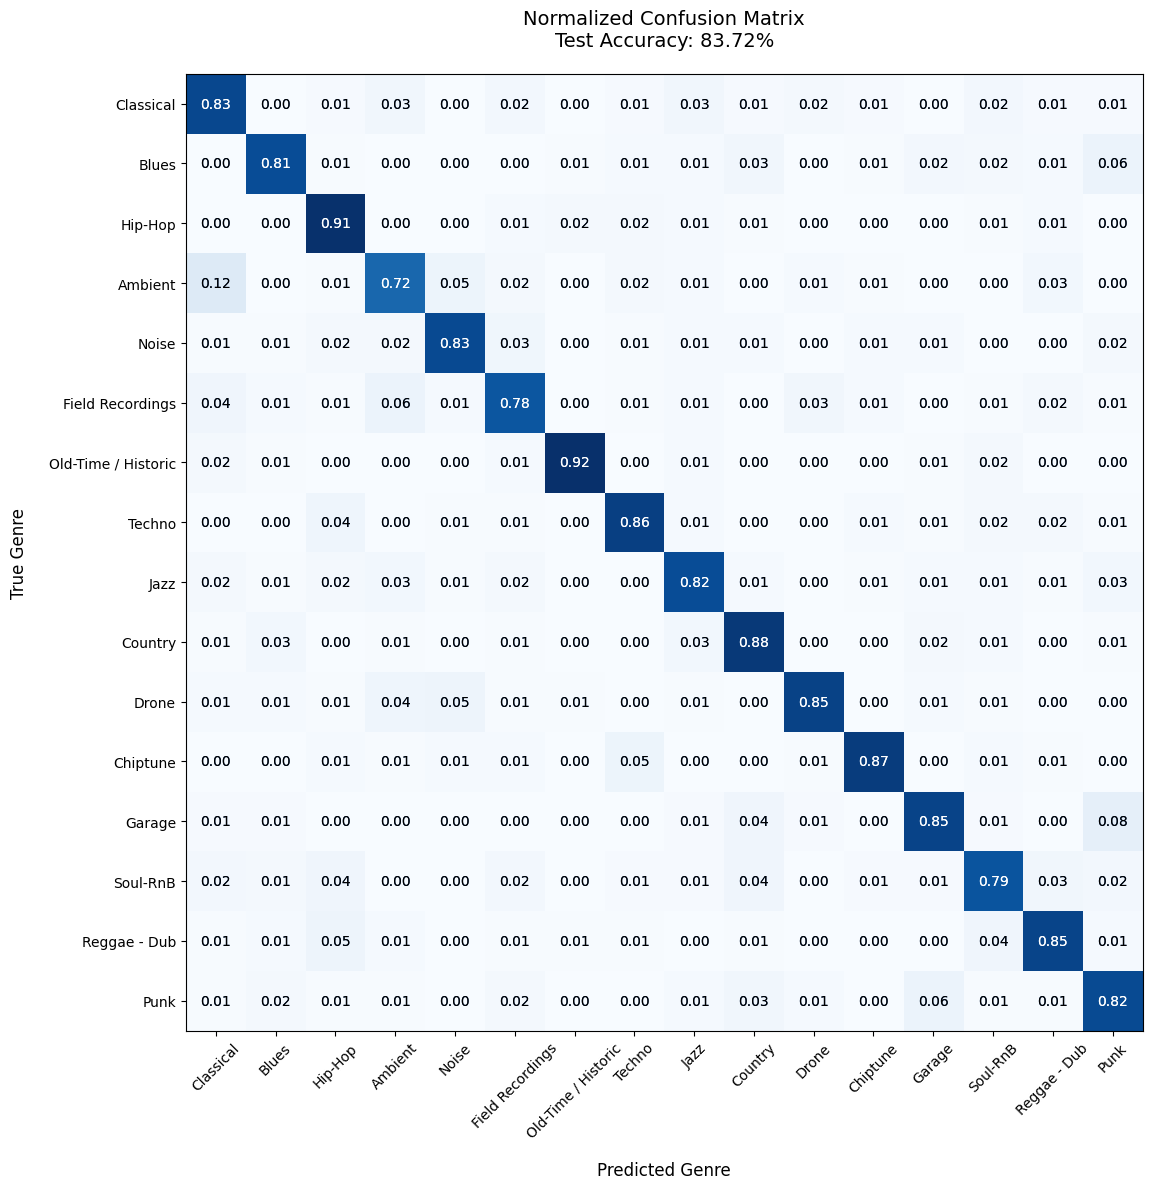


Classification Report:
                     precision    recall  f1-score   support

          Classical      0.736     0.832     0.781       131
              Blues      0.874     0.815     0.843       162
            Hip-Hop      0.816     0.910     0.861       156
            Ambient      0.765     0.722     0.743       144
              Noise      0.849     0.825     0.837       143
   Field Recordings      0.806     0.781     0.794       160
Old-Time / Historic      0.957     0.917     0.937       145
             Techno      0.862     0.862     0.862       145
               Jazz      0.815     0.815     0.815       146
            Country      0.828     0.884     0.855       147
              Drone      0.919     0.851     0.884       174
           Chiptune      0.919     0.873     0.895       142
             Garage      0.824     0.848     0.836       138
           Soul-RnB      0.791     0.791     0.791       139
       Reggae - Dub      0.856     0.845     0.851       155

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# ================================================
# Single Sample Prediction
# ================================================
sample_idx = 100
X_mfcc_to_predict = X_mfcc_test[sample_idx]
X_other_to_predict = X_other_test[sample_idx]
y_to_predict = y_test[sample_idx]

# Predict and show results
predicted = model.predict([X_mfcc_to_predict[np.newaxis, ...], 
                         X_other_to_predict[np.newaxis, ...]])
print(f"\nTrue Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(predicted)]}")
print(f"Confidence: {np.max(predicted) * 100:.2f}%")

# ================================================
# Full Test Set Evaluation
# ================================================
# Generate predictions
y_pred = model.predict([X_mfcc_test, X_other_test])
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute normalized confusion matrix (row-wise)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create plot
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_norm,
    display_labels=[genre_labels[i] for i in range(len(genre_labels))]
)
disp.plot(
    cmap='Blues',
    ax=plt.gca(),
    xticks_rotation=45,
    values_format='.2f',  # Show 2 decimal places
    colorbar=False
)

# Add custom annotations
for i in range(len(genre_labels)):
    for j in range(len(genre_labels)):
        value = conf_matrix_norm[i, j]
        plt.text(j, i, f"{value:.2f}",
                ha="center", va="center",
                color="white" if value > 0.5 else "black",
                fontsize=10)

# Formatting
plt.title(f"Normalized Confusion Matrix\nTest Accuracy: {accuracy_score(y_test, y_pred_labels):.2%}", 
          pad=20, fontsize=14)
plt.xlabel("Predicted Genre", fontsize=12, labelpad=15)
plt.ylabel("True Genre", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# Print detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, 
                           target_names=genre_labels, digits=3))

# Show class distribution
print("\nClass Distribution in Test Set:")
for i, genre in enumerate(genre_labels):
    count = sum(y_test == i)
    if count > 0:
        acc = accuracy_score(y_test[y_test == i], y_pred_labels[y_test == i])
        print(f"{genre:<20}: {acc:.2%} ({count} samples)")

In [4]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D, Activation, Concatenate
from tensorflow.keras.layers import PReLU, Layer, BatchNormalization
from tqdm import tqdm
import tensorflow as tf

# Configurations - Added USE_BATCH_NORM flag
class Config:
    MCLNN_LAYER_COUNT = 3
    DENSE_LAYER_COUNT = 2
    TOTAL_LAYER_COUNT = MCLNN_LAYER_COUNT + DENSE_LAYER_COUNT
    HIDDEN_NODES_LIST = [220, 200, 180]
    OTHER_FEATURES_NODES = [128, 64]
    DENSE_NODES = [50, 16]
    MASK_BANDWIDTH = [40, 10, 5]
    MASK_OVERLAP = [-10, 3, 1]
    LAYERS_ORDER_LIST = [4, 4, 4]
    LAYER_IS_MASKED = [True, True, True]
    DROPOUT = [0.01, 0.4, 0.2, 0.1, 0.2]
    OTHER_FEATURES_DROPOUT = [0.15, 0.15]
    WEIGHT_INITIALIZATION = ['he_normal', 'he_normal', 'he_normal', 'glorot_uniform', 'glorot_uniform']
    LEARNING_RATE = 0.0001
    USE_BATCH_NORM = True  # New flag to control batch normalization

# MaskedConditional Layer (unchanged)
class MaskedConditional(Layer):
    def __init__(self, output_dim, init='glorot_uniform', order=5, bandwidth=1, overlap=0, layer_is_masked=True, **kwargs):
        super(MaskedConditional, self).__init__(**kwargs)
        self.output_dim = output_dim
        self.init = keras.initializers.get(init)
        self.order = order
        self.bandwidth = bandwidth
        self.overlap = overlap
        self.layer_is_masked = layer_is_masked

    def build(self, input_shape):
        input_dim = input_shape[-1]
        kernel_size = self.order * 2 + 1
        self.kernel_size = kernel_size

        self.W = self.add_weight(
            shape=(kernel_size, input_dim, self.output_dim),
            initializer=self.init,
            trainable=True,
            name='weights'
        )
        self.b = self.add_weight(
            shape=(self.output_dim,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )

        self.weightmask = self.construct_mask(
            input_dim, self.output_dim, self.bandwidth, self.overlap, self.layer_is_masked
        )
        self.weightmask = tf.expand_dims(self.weightmask, axis=0)
        self.weightmask = tf.tile(self.weightmask, [kernel_size, 1, 1])
        self.W.assign(self.W * self.weightmask)

        super(MaskedConditional, self).build(input_shape)

    def construct_mask(self, feature_count, hidden_count, bandwidth, overlap, layer_is_masked):
        bw = bandwidth
        ov = overlap
        l = feature_count
        e = hidden_count

        a = np.arange(1, bw + 1)
        g = np.arange(1, int(np.ceil((l * e) / (l + bw - ov))) + 1)

        if not layer_is_masked:
            binary_mask = np.ones([l, e])
        else:
            mask = np.zeros([l, e])
            flat_matrix = mask.flatten('F')

            for i in range(len(a)):
                for j in range(len(g)):
                    lx = a[i] + (g[j] - 1) * (l + bw - ov)
                    if lx <= l * e:
                        flat_matrix[lx - 1] = 1

            binary_mask = np.transpose(flat_matrix.reshape(e, l))

        return binary_mask.astype(np.float32)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        sequence_length = tf.shape(inputs)[1]
        feature_count = tf.shape(inputs)[2]

        padding = self.order
        padded_inputs = tf.pad(inputs, [[0, 0], [padding, padding], [0, 0]], mode='CONSTANT')

        outputs = tf.nn.conv1d(padded_inputs, self.W, stride=1, padding='VALID')
        outputs = outputs + self.b
        return outputs

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1], self.output_dim)

# Updated build_parallel_model with BatchNormalization
def build_parallel_model(mfcc_shape, other_features_dim, num_classes=16):
    # MFCC input branch
    mfcc_input = Input(shape=(mfcc_shape[0], mfcc_shape[1]), name='mfcc_input')
    x_mfcc = mfcc_input
    
    # Other features input branch
    other_input = Input(shape=(other_features_dim,), name='other_features_input')
    x_other = other_input
    
    # Process MFCC features through MCLNN layers with BatchNorm
    for layer_index in range(Config.MCLNN_LAYER_COUNT):
        x_mfcc = Dropout(Config.DROPOUT[layer_index])(x_mfcc)
        x_mfcc = MaskedConditional(
            init=Config.WEIGHT_INITIALIZATION[layer_index],
            output_dim=Config.HIDDEN_NODES_LIST[layer_index],
            order=Config.LAYERS_ORDER_LIST[layer_index],
            bandwidth=Config.MASK_BANDWIDTH[layer_index],
            overlap=Config.MASK_OVERLAP[layer_index],
            layer_is_masked=Config.LAYER_IS_MASKED[layer_index]
        )(x_mfcc)
        if Config.USE_BATCH_NORM:
            x_mfcc = BatchNormalization()(x_mfcc)
        x_mfcc = PReLU(shared_axes=[1])(x_mfcc)
    
    # Process other features through dense layers with BatchNorm
    for i, nodes in enumerate(Config.OTHER_FEATURES_NODES):
        x_other = Dropout(Config.OTHER_FEATURES_DROPOUT[i])(x_other)
        x_other = Dense(nodes, activation='relu')(x_other)
        if Config.USE_BATCH_NORM:
            x_other = BatchNormalization()(x_other)
    
    # Global pooling for MFCC features
    mfcc_features = GlobalAveragePooling1D()(x_mfcc)
    
    # Concatenate both feature streams
    combined = Concatenate()([mfcc_features, x_other])
    
    # Add final dense layers with BatchNorm
    for i in range(Config.DENSE_LAYER_COUNT):
        combined = Dropout(Config.DROPOUT[i + Config.MCLNN_LAYER_COUNT])(combined)
        combined = Dense(
            units=Config.DENSE_NODES[i],
            kernel_initializer=Config.WEIGHT_INITIALIZATION[i + Config.MCLNN_LAYER_COUNT]
        )(combined)
        if Config.USE_BATCH_NORM:
            combined = BatchNormalization()(combined)
        if i < Config.DENSE_LAYER_COUNT - 1:
            combined = PReLU()(combined)
        else:
            combined = Activation('softmax')(combined)
    
    model = Model(inputs=[mfcc_input, other_input], outputs=combined)
    optimiser = keras.optimizers.Adam(learning_rate=Config.LEARNING_RATE)
    model.compile(optimizer=optimiser, 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

# Main execution remains the same
if __name__ == "__main__":
    # Prepare datasets (now returns both MFCC and other features)
    (X_mfcc_train, X_other_train), (X_mfcc_val, X_other_val), \
    (X_mfcc_test, X_other_test), y_train, y_val, y_test = prepare_datasets(0.15, 0.15)

    # Squeeze the last dimension if it's 1 (remove unnecessary channels dimension)
    X_mfcc_train = X_mfcc_train.squeeze(-1)
    X_mfcc_val = X_mfcc_val.squeeze(-1)
    X_mfcc_test = X_mfcc_test.squeeze(-1)

    print(f"MFCC train shape: {X_mfcc_train.shape}, Other features train shape: {X_other_train.shape}")
    print(f"MFCC val shape: {X_mfcc_val.shape}, Other features val shape: {X_other_val.shape}")

    # Build and compile the model
    mfcc_shape = (X_mfcc_train.shape[1], X_mfcc_train.shape[2])
    other_features_dim = X_other_train.shape[1]
    model = build_parallel_model(mfcc_shape, other_features_dim)
    model.summary()

    # Add callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=10)
    ]

    # Train the model
    history = model.fit(
        [X_mfcc_train, X_other_train], y_train,
        validation_data=([X_mfcc_val, X_other_val], y_val),
        batch_size=32,
        epochs=300,
        callbacks=callbacks
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate([X_mfcc_test, X_other_test], y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc}')
    plot_history(history)
    
    # Predict a sample from the test set
    X_mfcc_to_predict = X_mfcc_test[100][np.newaxis, ...]
    X_other_to_predict = X_other_test[100][np.newaxis, ...]
    y_to_predict = y_test[100]
    predict(model, [X_mfcc_to_predict, X_other_to_predict], y_to_predict)

MFCC train shape: (34308, 130, 13), Other features train shape: (34308, 798)
MFCC val shape: (2019, 130, 13), Other features val shape: (2019, 798)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ mfcc_input (InputLayer)       │ (None, 130, 13)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 130, 13)           │               0 │ mfcc_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional            │ (None, 130, 220)          │          25,960 │ dropout[0][0]              │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 130, 220)          │             880 │ masked_conditional[0][0]   │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu (PReLU)               │ (None, 130, 220)          │             220 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 130, 220)          │               0 │ p_re_lu[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_1          │ (None, 130, 200)          │         396,200 │ dropout_1[0][0]            │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 130, 200)          │             800 │ masked_conditional_1[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ other_features_input          │ (None, 798)               │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ p_re_lu_1 (PReLU)             │ (None, 130, 200)          │             200 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 798)               │               0 │ other_features_input[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 130, 200)          │               0 │ p_re_lu_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │         102,272 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masked_conditional_2          │ (None, 130, 180)          │         324,180 │ dropout_2[0][0]            │
│ (MaskedConditional)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 874,016 (3.33 MB)

 Trainable params: 872,300 (3.33 MB)

 Non-trainable params: 1,716 (6.70 KB)

Epoch 1/300


C:\Users\HASSAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['mfcc_input', 'other_features_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 72s 62ms/step - accuracy: 0.1791 - loss: 2.6069 - val_accuracy: 0.3616 - val_loss: 2.0575 - learning_rate: 1.0000e-04
Epoch 2/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 67s 62ms/step - accuracy: 0.2796 - loss: 2.2504 - val_accuracy: 0.3749 - val_loss: 1.9309 - learning_rate: 1.0000e-04
Epoch 3/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - accuracy: 0.3177 - loss: 2.1367 - val_accuracy: 0.4121 - val_loss: 1.8428 - learning_rate: 1.0000e-04
Epoch 4/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - accuracy: 0.3392 - loss: 2.0720 - val_accuracy: 0.4230 - val_loss: 1.7978 - learning_rate: 1.0000e-04
Epoch 5/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 67s 63ms/step - accuracy: 0.3581 - loss: 2.0094 - val_accuracy: 0.4641 - val_loss: 1.6919 - learning_rate: 1.0000e-04
Epoch 6/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 69s 64ms/step - accuracy: 0.3758 - loss: 1.9622 - val_accuracy: 0.4789 - val_loss: 1.6694 - learning_rate: 1.0000e-04
Epoch 7/300
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 69s

NameError: name 'plot_history' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

True Genre: Classical
Predicted Genre: Classical
Confidence: 99.38%
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


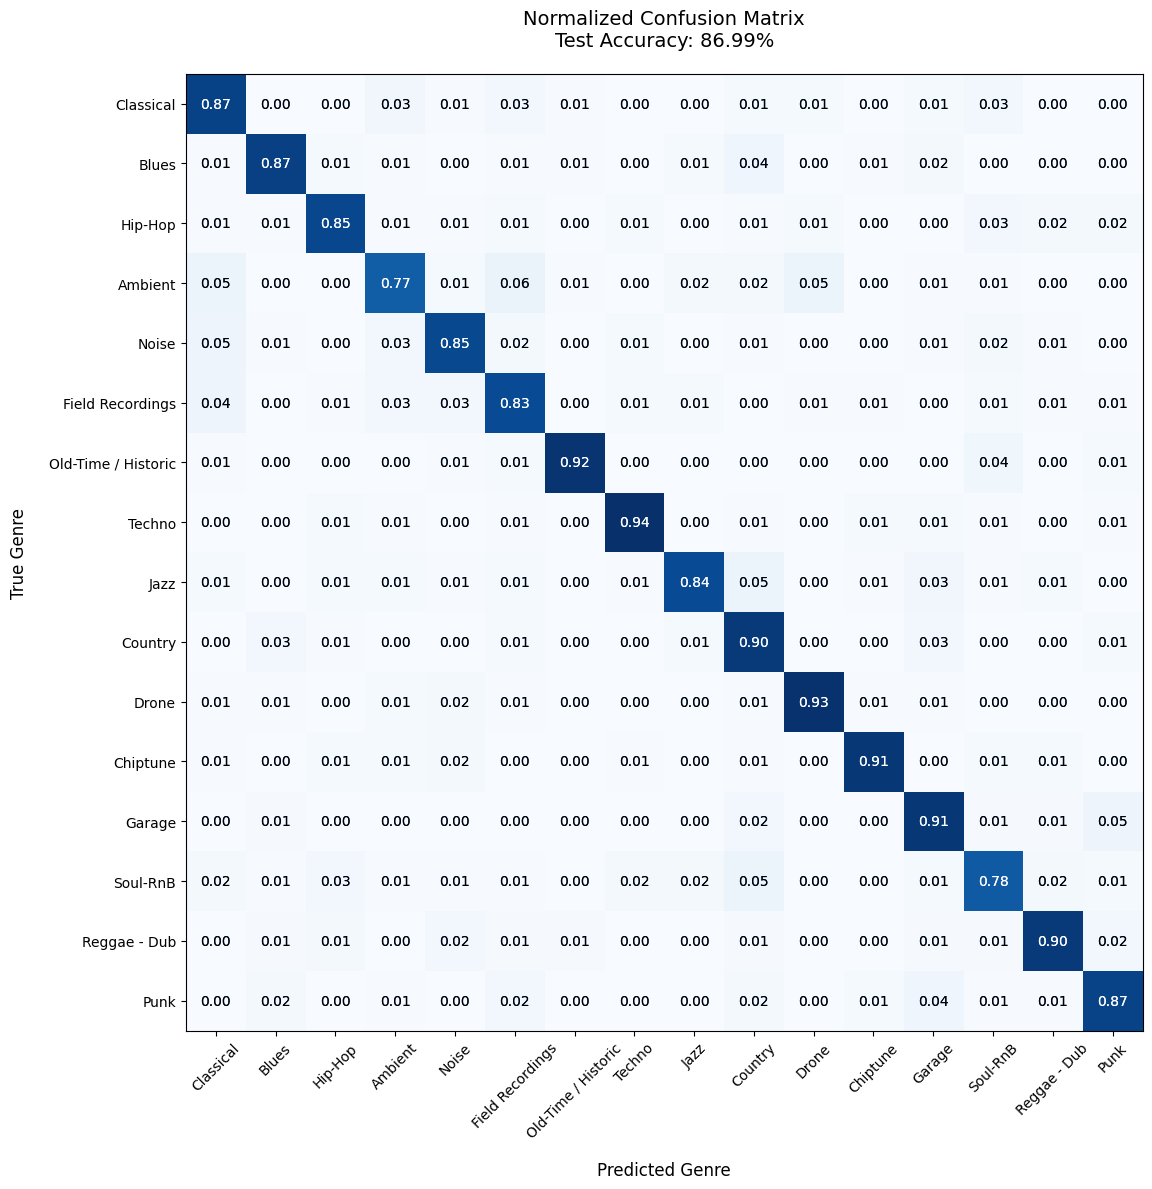


Classification Report:
                     precision    recall  f1-score   support

          Classical      0.815     0.867     0.840       158
              Blues      0.905     0.873     0.889       142
            Hip-Hop      0.881     0.850     0.865       140
            Ambient      0.825     0.769     0.796       147
              Noise      0.864     0.847     0.855       150
   Field Recordings      0.798     0.833     0.815       156
Old-Time / Historic      0.969     0.920     0.944       137
             Techno      0.935     0.935     0.935       170
               Jazz      0.919     0.835     0.875       164
            Country      0.782     0.901     0.837       151
              Drone      0.921     0.927     0.924       150
           Chiptune      0.946     0.910     0.928       155
             Garage      0.800     0.906     0.850       128
           Soul-RnB      0.813     0.785     0.799       144
       Reggae - Dub      0.896     0.896     0.896       135

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load genre labels
with open(JSON_PATH, "r") as fp:
    genre_labels = json.load(fp)["mapping"]

# ================================================
# Single Sample Prediction
# ================================================
sample_idx = 100
X_mfcc_to_predict = X_mfcc_test[sample_idx]
X_other_to_predict = X_other_test[sample_idx]
y_to_predict = y_test[sample_idx]

# Predict and show results
predicted = model.predict([X_mfcc_to_predict[np.newaxis, ...], 
                         X_other_to_predict[np.newaxis, ...]])
print(f"\nTrue Genre: {genre_labels[y_to_predict]}")
print(f"Predicted Genre: {genre_labels[np.argmax(predicted)]}")
print(f"Confidence: {np.max(predicted) * 100:.2f}%")

# ================================================
# Full Test Set Evaluation
# ================================================
# Generate predictions
y_pred = model.predict([X_mfcc_test, X_other_test])
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute normalized confusion matrix (row-wise)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create plot
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix_norm,
    display_labels=[genre_labels[i] for i in range(len(genre_labels))]
)
disp.plot(
    cmap='Blues',
    ax=plt.gca(),
    xticks_rotation=45,
    values_format='.2f',  # Show 2 decimal places
    colorbar=False
)

# Add custom annotations
for i in range(len(genre_labels)):
    for j in range(len(genre_labels)):
        value = conf_matrix_norm[i, j]
        plt.text(j, i, f"{value:.2f}",
                ha="center", va="center",
                color="white" if value > 0.5 else "black",
                fontsize=10)

# Formatting
plt.title(f"Normalized Confusion Matrix\nTest Accuracy: {accuracy_score(y_test, y_pred_labels):.2%}", 
          pad=20, fontsize=14)
plt.xlabel("Predicted Genre", fontsize=12, labelpad=15)
plt.ylabel("True Genre", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# Print detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, 
                           target_names=genre_labels, digits=3))

# Show class distribution
print("\nClass Distribution in Test Set:")
for i, genre in enumerate(genre_labels):
    count = sum(y_test == i)
    if count > 0:
        acc = accuracy_score(y_test[y_test == i], y_pred_labels[y_test == i])
        print(f"{genre:<20}: {acc:.2%} ({count} samples)")

In [ ]:
import json
import os
import math
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tqdm import tqdm
import json
import os
import math
import librosa

In [4]:
import pandas as pd

# Track counts per genre
genre_counts = {'Classical': 642,
'Blues' :662,
'Hip-Hop' :2045,
'Ambient' :2985,
'Noise' :2870,
'Field Recordings' :1163,
'Old-Time / Historic' :187,
'Techno' :630,
'Jazz' :625,
'Country' :293,
'Drone' :744,
'Chiptune' :284,
'Garage' :773,
'Soul-RnB' :169,
'Reggae - Dub' :288,
'Punk' :1691,
}

# Target number of tracks per genre
target_tracks = 100


# Calculate multiplier for each genre
multipliers = {genre: target_tracks / count for genre, count in genre_counts.items()}

# Display the result
multipliers_df = pd.DataFrame(list(multipliers.items()), columns=["Genre", "Multiplier"])
print(multipliers_df)


                  Genre  Multiplier
0             Classical    0.155763
1                 Blues    0.151057
2               Hip-Hop    0.048900
3               Ambient    0.033501
4                 Noise    0.034843
5      Field Recordings    0.085985
6   Old-Time / Historic    0.534759
7                Techno    0.158730
8                  Jazz    0.160000
9               Country    0.341297
10                Drone    0.134409
11             Chiptune    0.352113
12               Garage    0.129366
13             Soul-RnB    0.591716
14         Reggae - Dub    0.347222
15                 Punk    0.059137
